In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

# Data Preparation

In [3]:
df=pd.read_csv('customers.csv ')
df

,ID,Gender,Age,Profession,Income,Spending_Score,Segmentation
0,1,Male,22,Healthcare,58138,Low,D
1,2,Female,38,Engineer,46344,Average,A
2,3,Female,67,Engineer,71613,Low,B
3,4,Male,67,Lawyer,26646,High,B
4,5,Female,40,Entertainment,58293,High,A
...,...,...,...,...,...,...,...
2211,2212,Male,37,Entertainment,61223,Average,C
2212,2213,Male,27,Doctor,64014,Low,B
2213,2214,Male,48,Artist,56981,Average,B
2214,2215,Female,25,Marketing,69245,Low,D


In [4]:
df.head()

,ID,Gender,Age,Profession,Income,Spending_Score,Segmentation
0,1,Male,22,Healthcare,58138,Low,D
1,2,Female,38,Engineer,46344,Average,A
2,3,Female,67,Engineer,71613,Low,B
3,4,Male,67,Lawyer,26646,High,B
4,5,Female,40,Entertainment,58293,High,A


In [5]:
df.tail(10)

,ID,Gender,Age,Profession,Income,Spending_Score,Segmentation
2206,2207,Male,20,Healthcare,11012,Low,D
2207,2208,Female,42,Artist,44802,Low,A
2208,2209,Female,38,Engineer,26816,High,B
2209,2210,Female,52,Engineer,666666,Low,A
2210,2211,Female,48,Marketing,34421,Low,D
2211,2212,Male,37,Entertainment,61223,Average,C
2212,2213,Male,27,Doctor,64014,Low,B
2213,2214,Male,48,Artist,56981,Average,B
2214,2215,Female,25,Marketing,69245,Low,D
2215,2216,Female,56,Doctor,52869,Low,A


# EDA(Exploratory data analysis)

array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Income'}>, <Axes: >]], dtype=object)

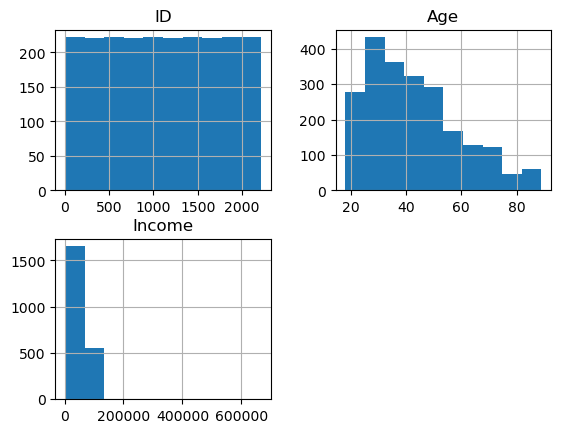

In [6]:
df.hist()

In [7]:
df.describe()

,ID,Age,Income
count,2216.00000,2216.000000,2216.000000
mean,1108.50000,43.065433,52247.251354
std,639.84842,16.484831,25173.076661
min,1.00000,18.000000,1730.000000
25%,554.75000,30.000000,35303.000000
50%,1108.50000,40.000000,51381.500000
75%,1662.25000,53.000000,68522.000000
max,2216.00000,89.000000,666666.000000


In [8]:
df.isnull().sum()

ID                 0
Gender             0
Age                0
Profession        37
Income             0
Spending_Score     0
Segmentation       0
dtype: int64

In [9]:
data=df.fillna(method="bfill")
data.isnull().sum()

ID                0
Gender            0
Age               0
Profession        0
Income            0
Spending_Score    0
Segmentation      0
dtype: int64

In [10]:
#convert string values in columns 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
data.head()

,ID,Gender,Age,Profession,Income,Spending_Score,Segmentation
0,1,1,22,Healthcare,58138,Low,D
1,2,0,38,Engineer,46344,Average,A
2,3,0,67,Engineer,71613,Low,B
3,4,1,67,Lawyer,26646,High,B
4,5,0,40,Entertainment,58293,High,A


In [11]:
data['Profession']=le.fit_transform(data['Profession'])
data['Spending_Score']=le.fit_transform(data['Spending_Score'])
data['Segmentation']=le.fit_transform(data['Segmentation'])
data.head()

,ID,Gender,Age,Profession,Income,Spending_Score,Segmentation
0,1,1,22,5,58138,2,3
1,2,0,38,2,46344,0,0
2,3,0,67,2,71613,2,1
3,4,1,67,7,26646,1,1
4,5,0,40,3,58293,1,0


array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Profession'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Spending_Score'}>],
       [<Axes: title={'center': 'Segmentation'}>, <Axes: >, <Axes: >]],
      dtype=object)

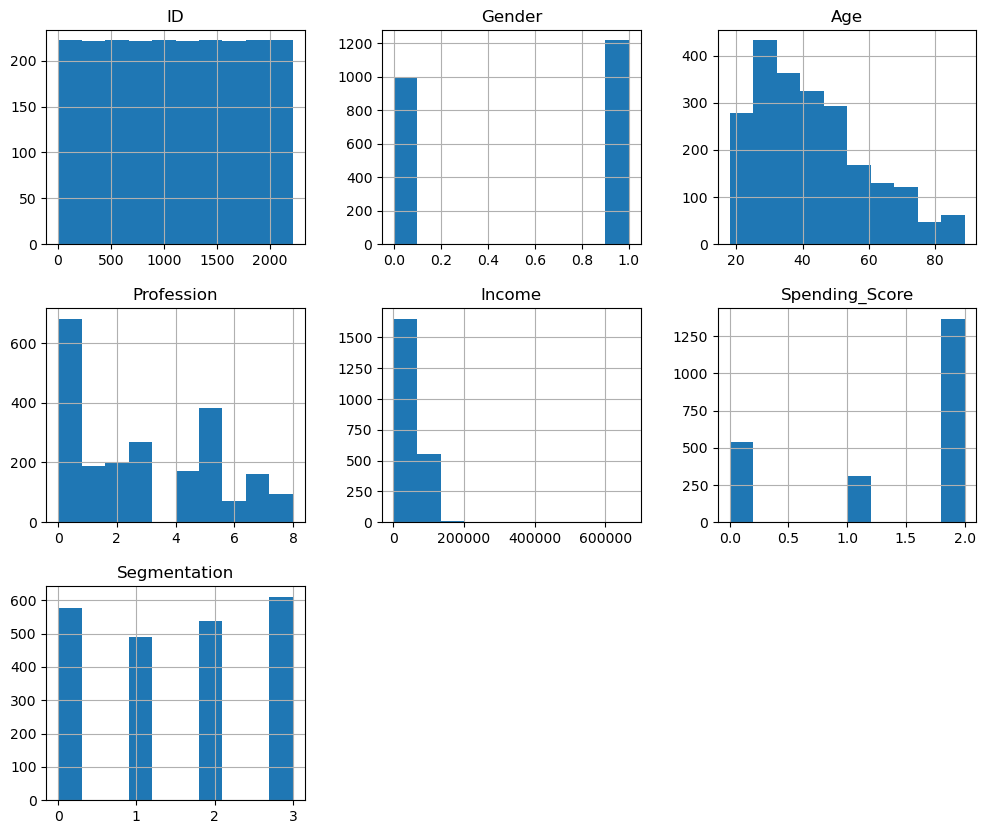

In [12]:
data.hist(figsize=(12,10))

In [13]:
data.shape

(2216, 7)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              2216 non-null   int64
 1   Gender          2216 non-null   int32
 2   Age             2216 non-null   int64
 3   Profession      2216 non-null   int32
 4   Income          2216 non-null   int64
 5   Spending_Score  2216 non-null   int32
 6   Segmentation    2216 non-null   int32
dtypes: int32(4), int64(3)
memory usage: 86.7 KB


<Axes: >

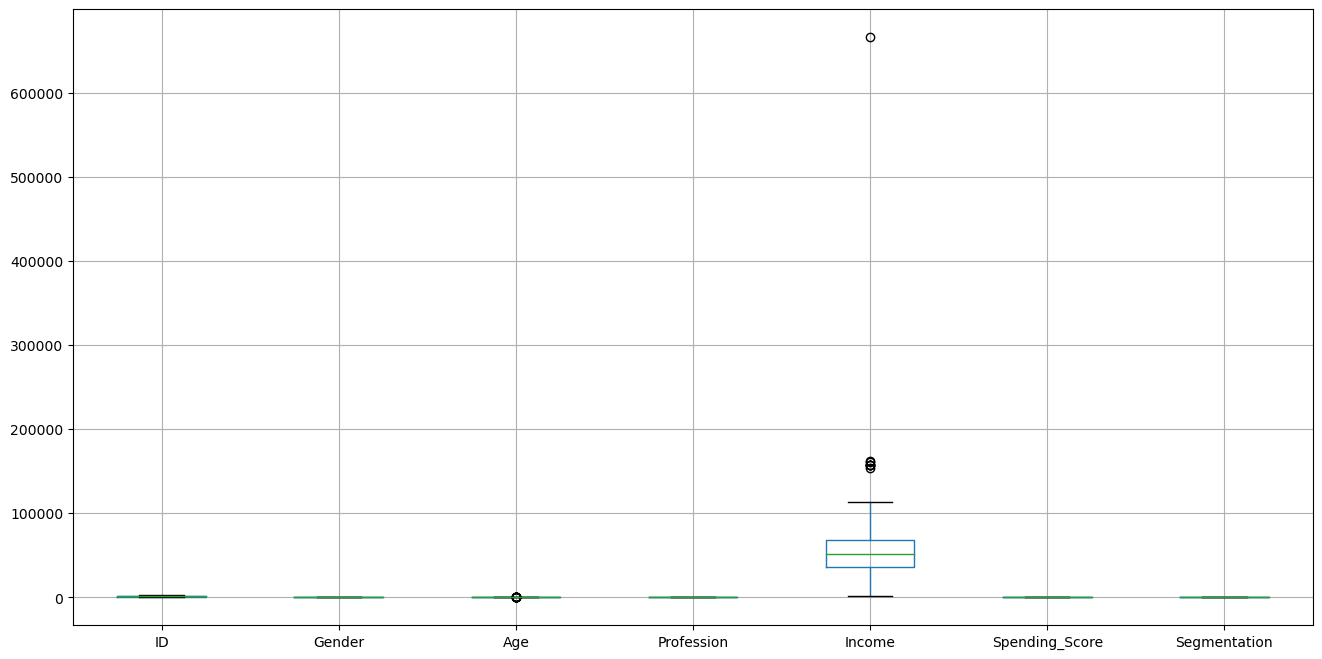

In [15]:
data.boxplot(figsize=(16,8))

<Axes: >

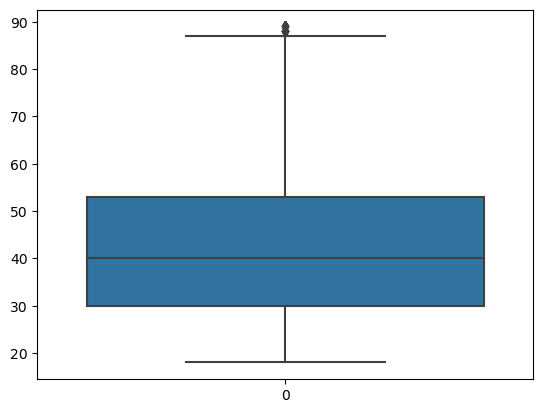

In [16]:
sns.boxplot(data['Age'])

<Axes: >

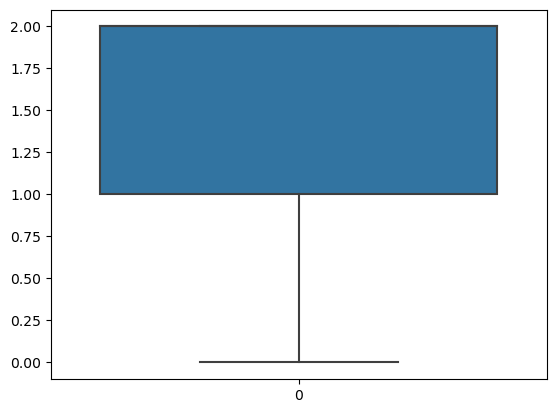

In [17]:
sns.boxplot(data['Spending_Score'])

<Axes: >

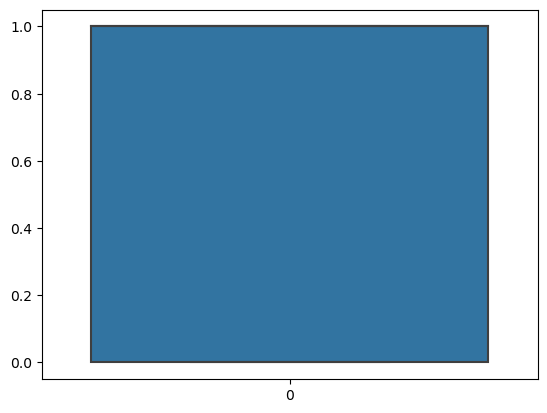

In [18]:
sns.boxplot(data['Gender'])

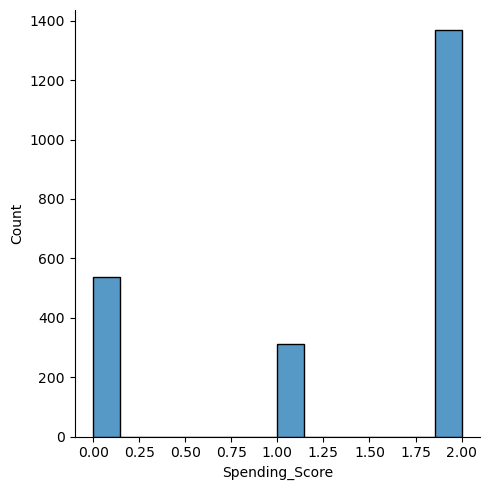

In [19]:
sns.displot(data['Spending_Score'])

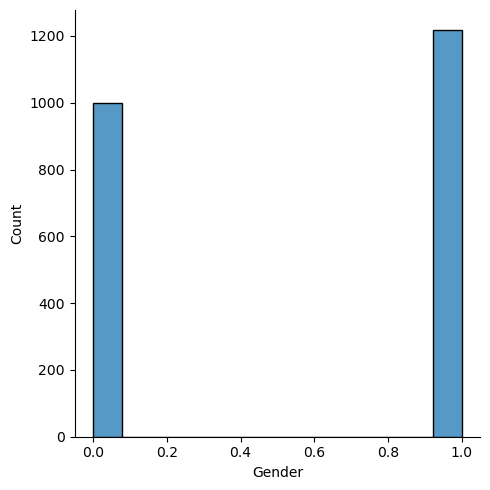

In [20]:
sns.displot(data['Gender'])

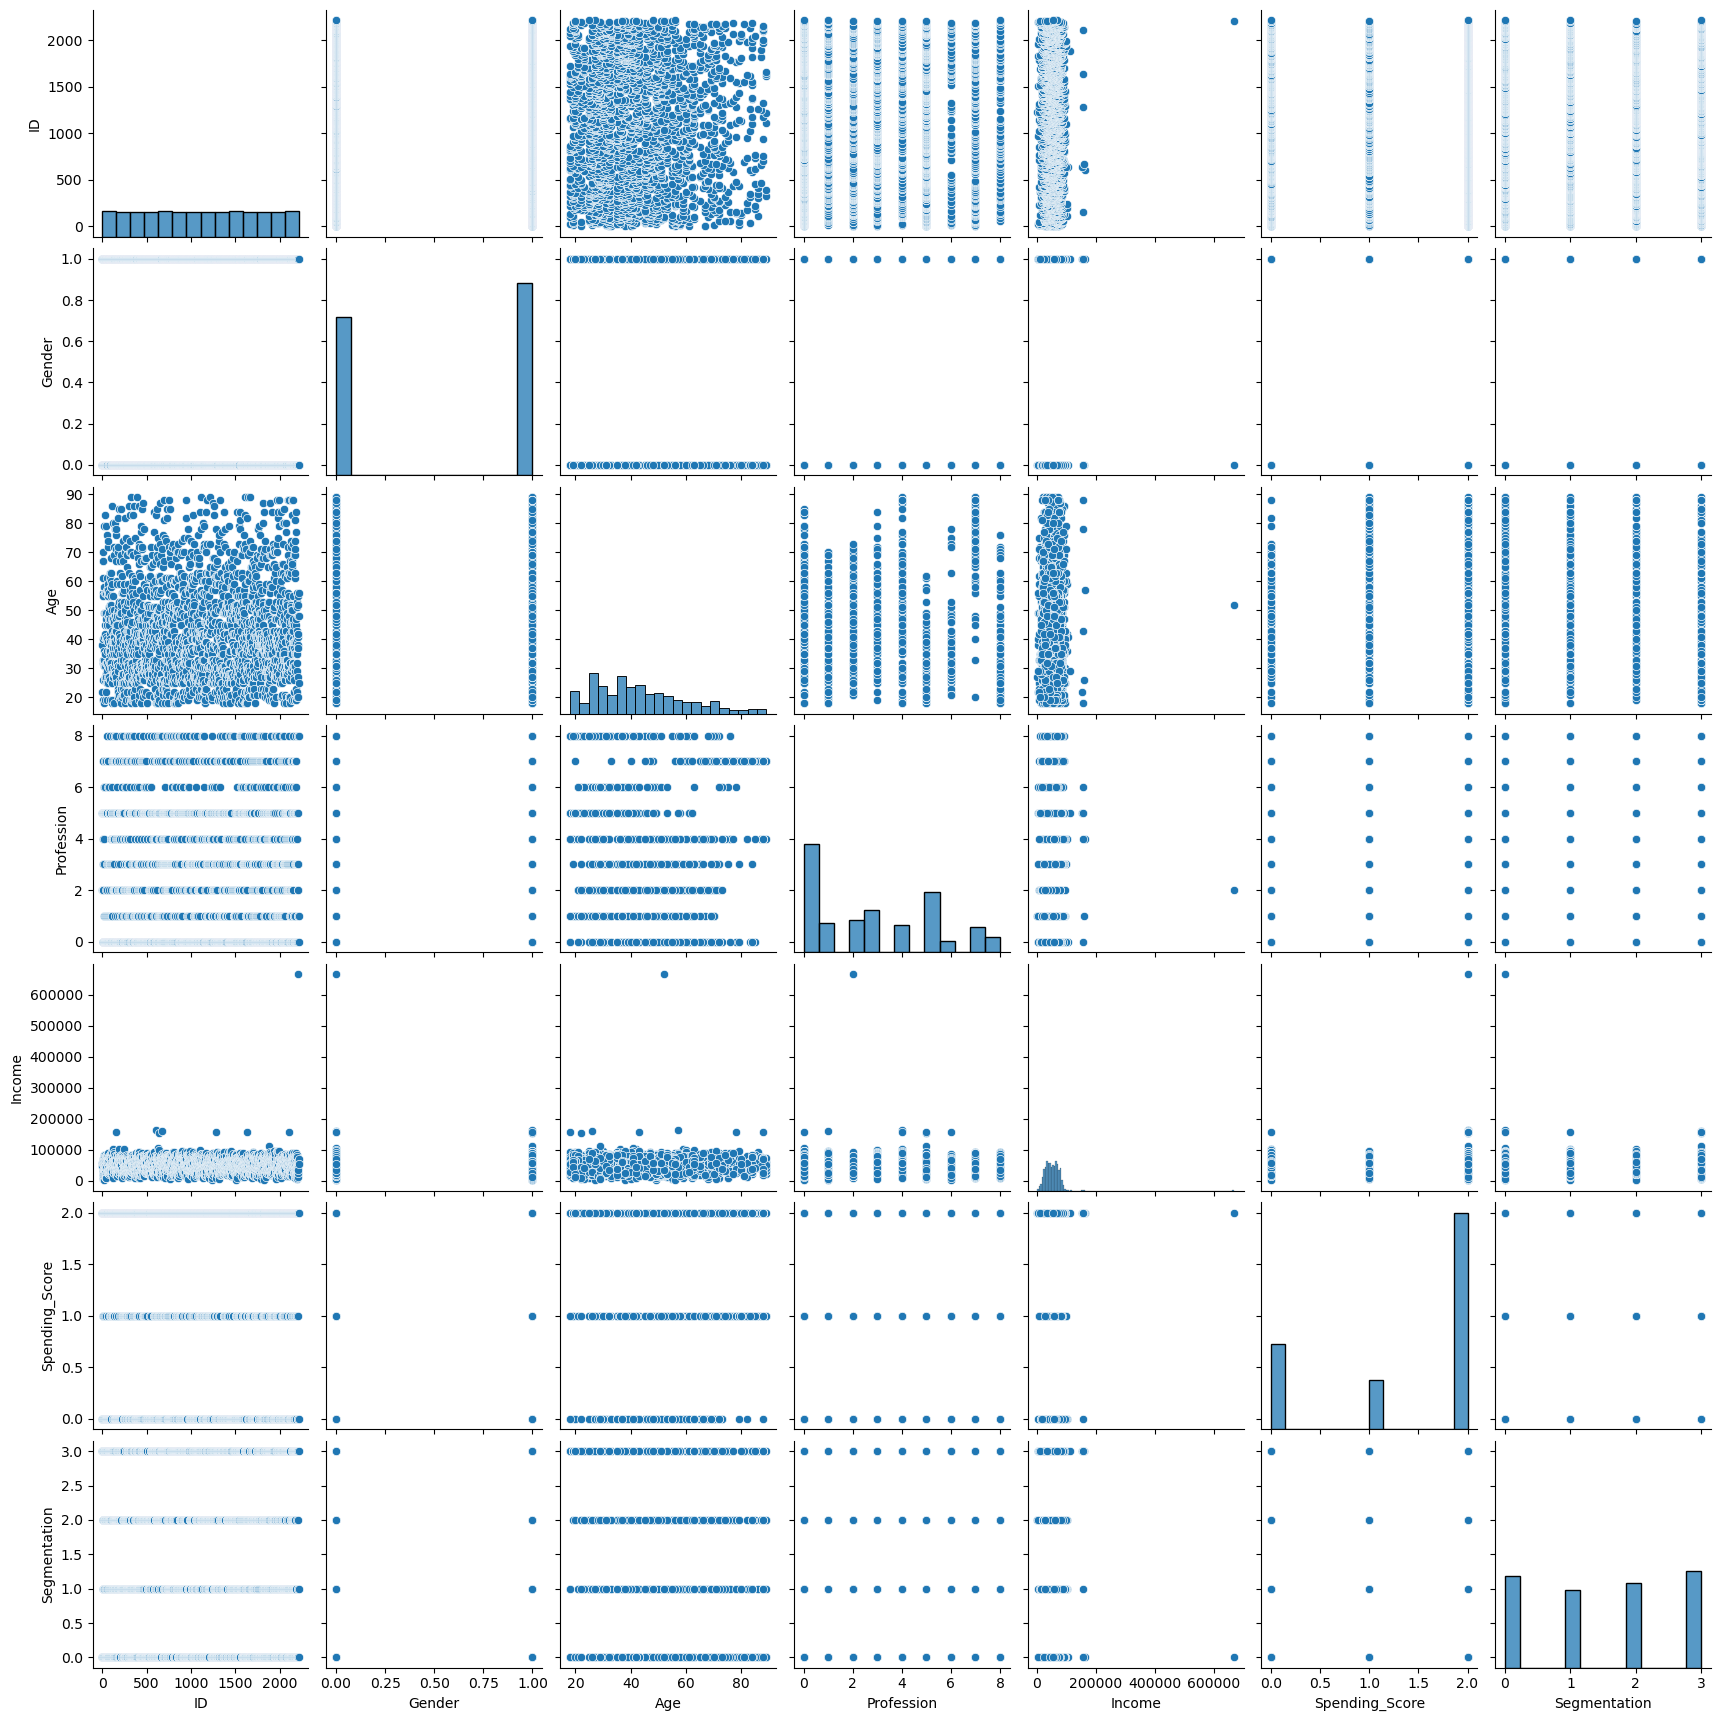

In [21]:
sns.pairplot(data)

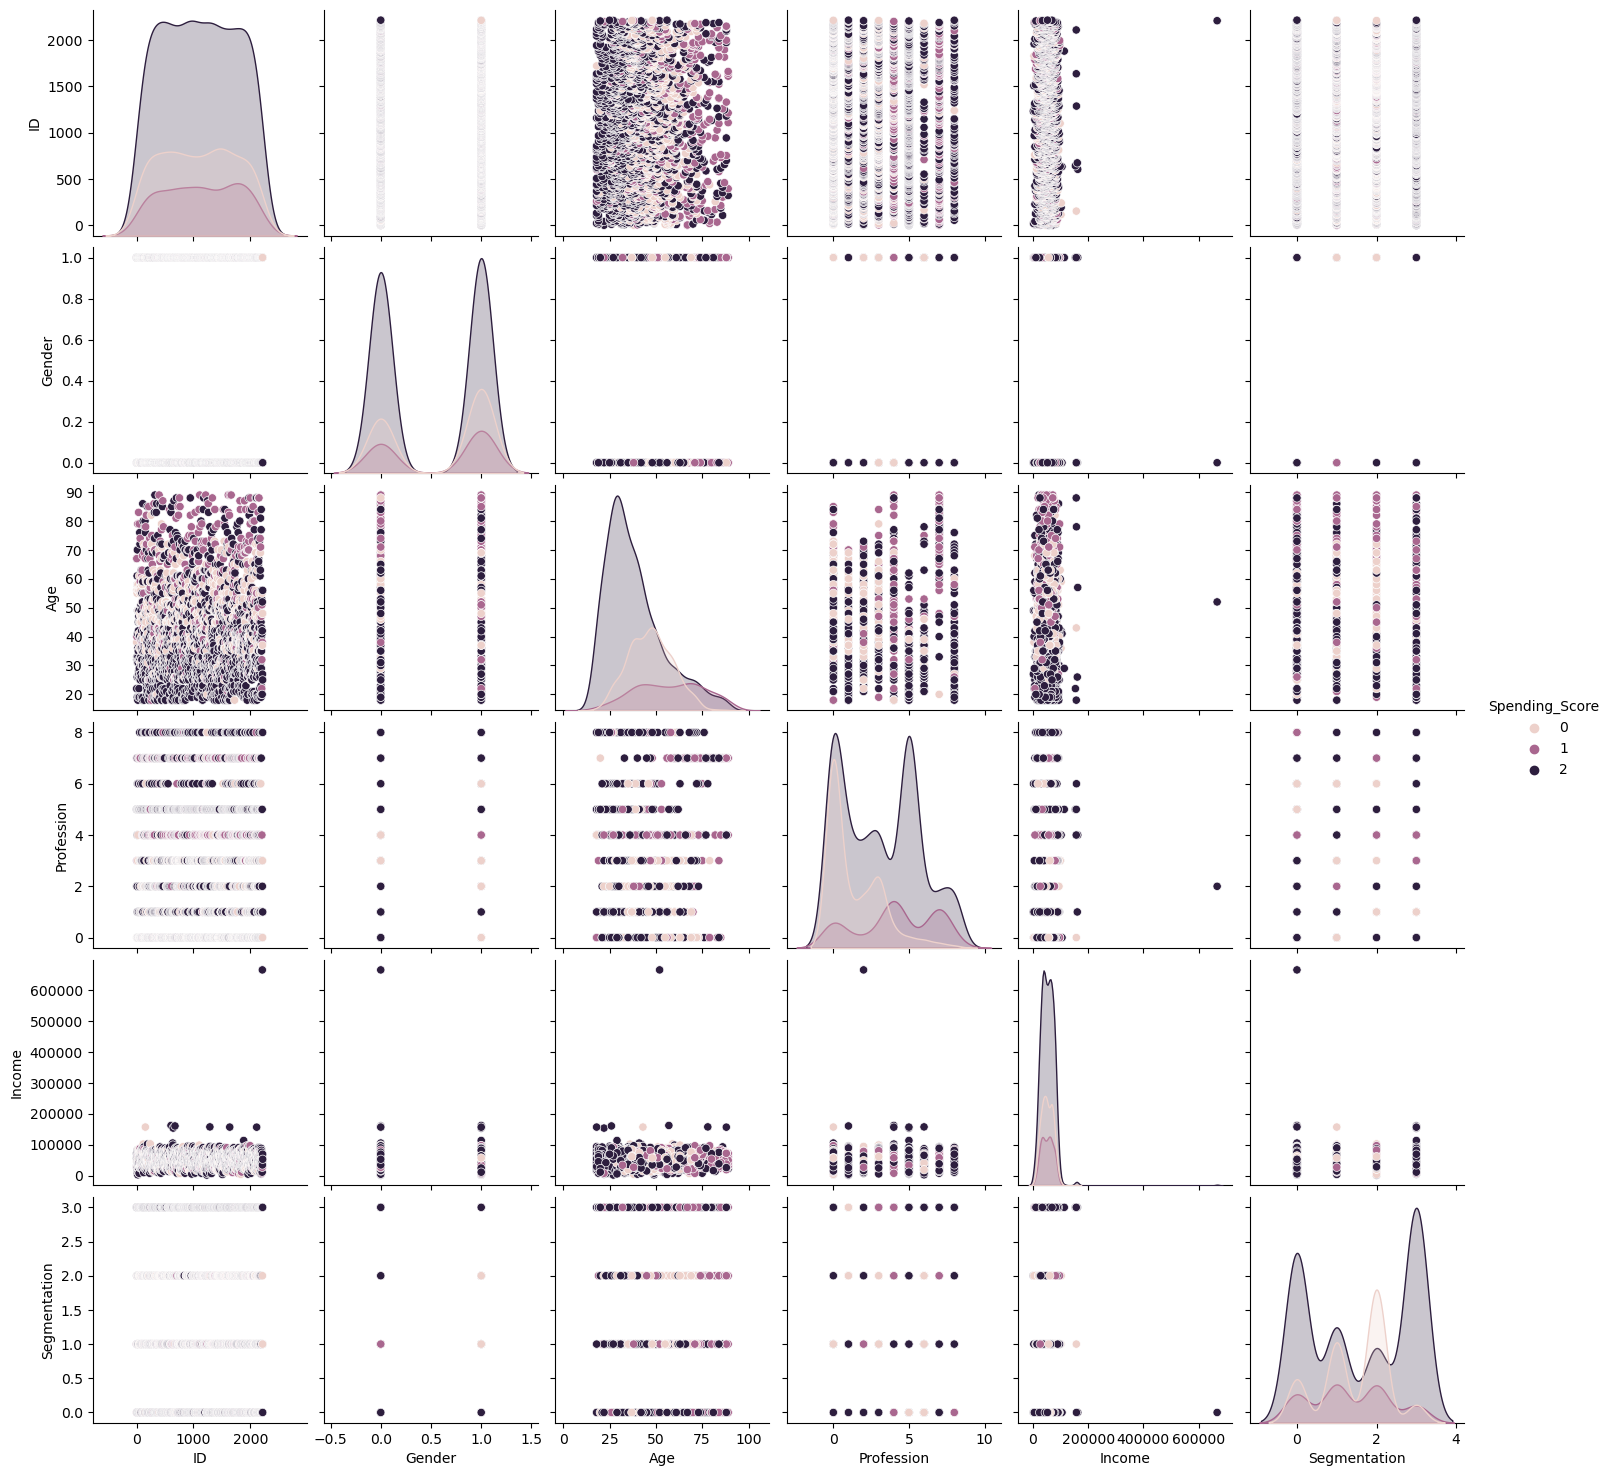

In [22]:
sns.pairplot(data,hue='Spending_Score')

# Assign X and Y

In [23]:
x=data.iloc[:,:-1]
x.head(3)

,ID,Gender,Age,Profession,Income,Spending_Score
0,1,1,22,5,58138,2
1,2,0,38,2,46344,0
2,3,0,67,2,71613,2


In [24]:
y=data.iloc[:,-1:]
y.head(3)

,Segmentation
0,3
1,0
2,1


# Build KNN model

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [26]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
print('******************Training Data shape***************\n')
print('Training data-x-Shape:\t',xtrain.shape)
print()
print('Training data-y-Shape:\t',ytrain.shape)
print()
print('******************Testing Data shape*****************\n')
print('Testing data(x-Input) shape:\t',xtest.shape)
print()
print('Testing data(y-outcome)shape:\t',ytest.shape)

******************Training Data shape***************

Training data-x-Shape:	 (1772, 6)

Training data-y-Shape:	 (1772, 1)

******************Testing Data shape*****************

Testing data(x-Input) shape:	 (444, 6)

Testing data(y-outcome)shape:	 (444, 1)


In [27]:
x.shape

(2216, 6)

In [28]:
xtrain.shape

(1772, 6)

In [29]:
xtest.shape

(444, 6)

In [37]:
#Train the model
knn_model=KNeighborsClassifier(n_neighbors=3)
print('********************KNN Classifier Model**********************')
print("Training Started.......\n")
print()
knn_model.fit(xtrain,ytrain)
print('Training completed.....')
print()
#test the data
print('Testing invoked......\n')
ypred=knn_model.predict(xtest)
print('Predicted Class Labels are: \n',ypred)
print('\nTesting is also completed....\n')

********************KNN Classifier Model**********************
Training Started.......


Training completed.....

Testing invoked......

Predicted Class Labels are: 
 [2 3 3 0 3 1 3 1 1 3 2 1 0 0 1 1 2 0 0 0 0 1 0 1 1 1 0 2 0 0 0 0 0 0 0 0 0
 0 3 0 0 0 0 0 2 3 2 0 3 0 1 2 0 2 1 0 0 3 0 0 0 0 0 1 2 3 1 0 1 2 1 0 0 2
 3 3 0 1 1 0 0 2 1 0 0 0 1 3 0 3 1 0 3 1 1 0 0 3 0 3 0 1 1 0 2 0 3 2 0 3 3
 1 1 3 1 3 3 3 2 3 0 0 3 0 0 3 0 0 2 1 3 3 0 2 3 0 0 1 0 0 0 0 0 0 0 0 3 0
 2 0 0 2 0 2 0 0 1 0 2 3 0 3 3 0 2 0 0 0 2 1 3 1 0 2 2 1 1 2 0 3 0 3 0 0 0
 0 0 1 1 0 2 0 1 1 1 2 2 0 0 0 0 2 0 1 2 1 2 0 3 3 0 3 0 1 0 0 0 0 2 0 3 2
 3 0 0 3 3 3 2 2 2 1 1 0 2 1 2 2 0 0 0 0 0 0 1 3 0 2 2 0 3 3 0 2 0 0 1 0 0
 1 0 0 0 0 2 3 2 1 0 0 0 2 3 1 0 3 0 1 0 1 0 0 0 1 0 3 0 1 3 0 3 1 1 3 0 1
 0 0 3 0 0 1 2 1 1 1 1 3 0 2 0 0 3 1 0 2 0 3 0 0 1 0 0 3 3 3 0 3 0 0 0 1 0
 1 1 1 3 0 0 2 3 0 0 0 1 3 0 0 0 0 3 3 1 1 3 2 3 1 0 2 3 0 0 0 1 1 1 1 1 2
 2 1 1 0 1 1 2 0 0 3 0 0 1 0 0 0 0 0 3 0 3 0 0 0 0 1 3 0 3 3 0 0 3 1 0 0 3
 1 1 0 0

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# Performance Measures

In [38]:
('Accuracy Score:\t',accuracy_score(ytest,ypred))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('Classification Report:\n',classification_report(ytest,ypred))


Confusion Matrix:
 [[55 23 21 27]
 [44 29 10 13]
 [49 16 13 22]
 [54 26 20 22]]

Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.44      0.34       126
           1       0.31      0.30      0.31        96
           2       0.20      0.13      0.16       100
           3       0.26      0.18      0.21       122

    accuracy                           0.27       444
   macro avg       0.26      0.26      0.25       444
weighted avg       0.26      0.27      0.26       444



In [39]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2216.0,1108.500000,639.848420,1.0,554.75,1108.5,1662.25,2216.0
Gender,2216.0,0.549188,0.497687,0.0,0.00,1.0,1.00,1.0
Age,2216.0,43.065433,16.484831,18.0,30.00,40.0,53.00,89.0
Profession,2216.0,2.837094,2.540524,0.0,0.00,3.0,5.00,8.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Spending_Score,2216.0,1.375000,0.848149,0.0,1.00,2.0,2.00,2.0


# Scaling the data

In [40]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x)
sc_y=sc.fit_transform(y)

In [41]:
sc_x.shape

(2216, 6)

In [42]:
sc_x[0]

array([-1.73126937,  0.90601931, -1.2781561 ,  0.85155437,  0.2340627 ,
        0.73706518])

In [43]:
sc_train_x=sc.fit_transform(xtrain)
sc_train_x

array([[-1.46709615, -1.10227038, -1.09249564,  0.85323811, -0.06868505,
         0.73056277],
       [ 0.05987193, -1.10227038, -1.09249564,  0.06288896, -1.70889963,
         0.73056277],
       [-1.51549698,  0.90721842, -0.24224367,  0.45806354,  0.49108921,
        -0.45060259],
       ...,
       [-0.21804251, -1.10227038,  2.1263154 ,  1.64358727,  1.08187505,
        -0.45060259],
       [ 0.57354524, -1.10227038,  0.91166972, -1.12263478,  0.6925499 ,
        -1.63176794],
       [-1.60761469, -1.10227038,  0.48654374,  0.06288896,  0.90054134,
        -1.63176794]])

In [44]:
sc_train_y=sc.fit_transform(ytrain)
sc_train_y

array([[ 1.27202977],
       [ 0.39837211],
       [-1.34894319],
       ...,
       [-0.47528554],
       [ 0.39837211],
       [-1.34894319]])

In [45]:
sc_train_x.shape

(1772, 6)

In [46]:
sc_train_x[0]

array([-1.46709615, -1.10227038, -1.09249564,  0.85323811, -0.06868505,
        0.73056277])

In [47]:
sc_test_x=sc.fit_transform(xtest)
sc_test_x

array([[-0.15228036,  0.9012463 ,  1.06587348,  0.06904025, -1.13932263,
        -1.58200657],
       [-0.43065047, -1.10957459,  0.34031146,  2.00915872,  0.44095021,
         0.76327195],
       [-1.54727631, -1.10957459, -1.05034907, -0.31898344, -1.40782641,
         0.76327195],
       ...,
       [ 0.84167391, -1.10957459,  1.851899  ,  1.62113502,  0.20756144,
         0.76327195],
       [-1.5850214 ,  0.9012463 ,  1.730972  , -1.09503083, -0.79515664,
        -1.58200657],
       [-1.77531961,  0.9012463 , -0.68756806,  0.84508764,  0.16395868,
         0.76327195]])

In [48]:
sc_test_x.shape

(444, 6)

In [49]:
sc_test_x[0]

array([-0.15228036,  0.9012463 ,  1.06587348,  0.06904025, -1.13932263,
       -1.58200657])

# After Scaling-Build KNN model(with k=3)

In [50]:
#Train the model
knn_model_sc=KNeighborsClassifier(n_neighbors=3)
print('********************KNN Classifier Model(after scaling)**********************')
print("Training Started.......\n")
print()
knn_model_sc.fit(sc_train_x,ytrain)
print('Training completed.....')
print()
#test the data
print('Testing invoked......\n')
ypred_sc=knn_model_sc.predict(sc_test_x)
print('Predicted Class Labels are: \n',ypred_sc)
print('\nTesting is also completed....\n')


********************KNN Classifier Model(after scaling)**********************
Training Started.......


Training completed.....

Testing invoked......

Predicted Class Labels are: 
 [1 3 0 3 3 1 3 3 0 0 0 1 3 3 0 3 3 2 0 3 2 3 0 3 2 3 3 3 2 1 0 3 0 2 1 0 0
 0 3 0 1 3 1 2 3 3 0 0 3 1 3 3 2 2 0 2 0 3 2 3 0 1 0 2 2 0 0 1 1 2 0 0 3 1
 2 0 2 2 0 0 1 0 3 3 1 2 2 2 3 2 1 0 0 0 0 1 1 2 3 0 3 2 1 0 0 1 3 1 0 2 2
 1 1 1 3 0 2 1 1 3 3 1 3 1 2 0 2 3 0 2 2 0 0 2 1 0 0 2 0 1 2 2 0 1 0 2 0 3
 1 0 0 3 3 2 0 0 0 2 3 2 3 2 2 3 0 3 3 0 1 0 0 3 2 2 0 3 0 2 0 3 2 3 1 1 2
 2 2 3 3 0 1 3 3 0 1 0 3 0 0 3 0 0 1 1 0 1 2 0 1 3 3 0 2 3 2 0 0 3 2 2 0 2
 3 0 1 3 3 1 3 3 3 2 0 0 0 0 2 0 0 3 2 1 3 0 0 0 2 2 3 2 0 3 0 2 3 0 0 0 0
 1 0 3 1 2 3 2 2 0 0 2 0 3 0 3 3 1 3 2 0 0 1 0 3 2 0 0 3 0 2 1 0 1 3 2 3 1
 1 3 1 0 2 0 0 0 0 3 0 0 0 3 3 1 1 2 2 0 2 0 0 0 2 1 1 1 3 0 0 1 2 0 2 0 1
 3 1 0 1 1 0 0 0 1 3 0 2 0 0 0 1 2 0 2 2 0 3 0 0 0 3 0 1 1 3 3 0 0 3 0 3 2
 0 2 0 3 3 2 0 2 3 0 0 0 0 3 0 3 0 3 1 0 2 0 2 0 2 0 1 0 1 2 0 1 1 3

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [51]:
#performance measures
print('Accuracy Score:\t',accuracy_score(ytest,ypred_sc))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_sc))
print()
print('Classification Report:\n',classification_report(ytest,ypred_sc))

Accuracy Score:	 0.44594594594594594

Confusion Matrix:
 [[57 30 20 19]
 [38 23 23 12]
 [29 17 46  8]
 [36  9  5 72]]

Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.45      0.40       126
           1       0.29      0.24      0.26        96
           2       0.49      0.46      0.47       100
           3       0.65      0.59      0.62       122

    accuracy                           0.45       444
   macro avg       0.45      0.44      0.44       444
weighted avg       0.45      0.45      0.45       444



# KNN model with k=5(After scaling)

In [52]:
#Train the model
knn_model_sc=KNeighborsClassifier(n_neighbors=5)
print('********************KNN Classifier Model(after scaling)**********************')
print("Training Started.......\n")
print()
knn_model_sc.fit(sc_train_x,ytrain)
print('Training completed.....')
print()
#test the data
print('Testing invoked......\n')
ypred_sc=knn_model_sc.predict(sc_test_x)
print('Predicted Class Labels are: \n',ypred_sc)
print('\nTesting is also completed....\n')
#performance measures
print('Accuracy Score:\t',accuracy_score(ytest,ypred_sc))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_sc))
print()
print('Classification Report:\n',classification_report(ytest,ypred_sc))


********************KNN Classifier Model(after scaling)**********************
Training Started.......


Training completed.....

Testing invoked......

Predicted Class Labels are: 
 [1 3 0 3 1 1 3 3 0 2 0 1 3 3 0 0 0 1 0 3 2 3 0 3 2 0 3 3 2 1 0 3 0 2 1 0 0
 0 3 0 1 3 1 2 3 3 0 2 3 1 3 3 2 2 1 2 0 3 2 3 3 1 3 2 2 0 2 2 1 2 3 0 3 1
 2 0 0 2 0 0 2 1 3 3 0 2 2 2 3 2 1 0 0 0 0 1 1 2 3 1 1 2 1 0 1 1 3 1 0 2 2
 1 2 1 3 0 2 1 1 3 3 1 3 1 2 0 1 3 0 2 2 3 0 2 1 0 0 1 1 1 0 2 0 2 0 0 3 1
 2 0 0 3 3 2 3 0 0 2 3 2 0 2 2 3 0 3 3 0 1 0 0 3 2 2 0 3 0 1 2 3 1 3 1 1 1
 2 1 1 3 0 1 3 3 0 1 0 3 2 0 3 1 0 1 2 0 1 2 0 1 3 3 0 1 3 2 0 0 3 2 1 0 2
 0 0 1 3 3 0 3 3 3 2 3 0 1 0 1 0 0 3 2 2 3 3 0 3 2 2 3 2 0 3 0 2 1 0 3 2 0
 1 0 3 1 2 3 2 1 0 0 2 1 3 0 3 3 1 0 2 0 1 1 0 3 2 0 0 3 0 2 1 3 1 3 1 3 0
 1 2 0 1 1 0 0 2 0 3 0 0 0 3 3 0 1 2 2 1 2 0 0 1 2 2 0 1 3 0 0 1 2 0 2 1 0
 3 2 0 1 1 0 0 0 1 3 0 2 0 3 0 1 2 1 2 2 0 3 1 0 0 3 0 1 1 3 3 0 3 3 0 3 2
 0 1 0 3 2 2 0 2 3 3 2 0 1 3 0 3 0 3 2 1 2 0 2 0 2 0 1 0 1 2 0 0 0 3

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# KNN model with k=7

In [53]:
#Train the model
knn_model_sc=KNeighborsClassifier(n_neighbors=7)
print('********************KNN Classifier Model(after scaling)**********************')
print("Training Started.......\n")
print()
knn_model_sc.fit(sc_train_x,ytrain)
print('Training completed.....')
print()
#test the data
print('Testing invoked......\n')
ypred_sc=knn_model_sc.predict(sc_test_x)
print('Predicted Class Labels are: \n',ypred_sc)
print('\nTesting is also completed....\n')
#performance measures
print('Accuracy Score:\t',accuracy_score(ytest,ypred_sc))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_sc))
print()
print('Classification Report:\n',classification_report(ytest,ypred_sc))

********************KNN Classifier Model(after scaling)**********************
Training Started.......


Training completed.....

Testing invoked......

Predicted Class Labels are: 
 [1 3 0 3 1 1 3 3 0 3 0 0 3 0 0 0 0 1 3 3 2 3 0 3 1 0 3 3 1 1 0 3 0 2 1 0 0
 0 3 0 1 3 1 2 3 3 0 2 3 2 3 3 2 3 0 2 0 3 2 3 3 1 0 2 2 0 2 3 0 2 3 0 3 2
 0 0 0 0 2 0 2 1 3 3 0 2 2 2 3 2 1 0 0 0 0 1 2 2 0 2 3 2 3 0 0 1 3 1 0 2 2
 0 2 1 3 0 2 1 1 3 3 0 3 1 2 0 1 3 0 2 1 0 3 2 1 0 0 1 1 1 0 1 0 1 0 0 3 0
 2 0 0 3 3 2 3 2 0 2 3 2 0 2 2 3 0 3 3 0 1 0 0 3 2 2 1 3 2 2 2 3 2 3 2 1 2
 2 2 3 3 0 0 3 3 0 1 0 3 2 0 3 1 0 1 0 0 1 2 1 1 3 3 0 1 3 2 0 0 3 2 1 0 1
 0 0 1 1 3 0 3 3 3 2 3 0 1 0 1 0 0 3 2 2 3 3 0 0 2 2 3 2 0 3 3 2 1 0 3 2 0
 1 0 3 0 2 3 0 0 0 0 2 1 3 0 3 3 1 3 0 0 0 1 1 3 2 0 0 3 0 2 1 3 1 3 2 3 0
 0 2 1 1 1 0 0 1 0 2 0 0 0 3 3 0 1 2 0 1 2 0 0 1 2 2 0 1 3 3 0 1 2 0 2 1 0
 3 1 2 0 1 0 3 0 1 3 0 2 0 3 0 1 2 2 1 2 0 3 0 0 0 3 0 1 3 3 3 3 3 3 0 3 2
 0 1 0 3 2 2 0 2 3 0 0 0 1 3 0 3 0 3 1 1 2 0 2 0 2 3 1 0 1 0 0 1 2 3

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# KNN with k=9

In [54]:
#Train the model
knn_model_sc=KNeighborsClassifier(n_neighbors=9)
print('********************KNN Classifier Model(after scaling)**********************')
print("Training Started.......\n")
print()
knn_model_sc.fit(sc_train_x,ytrain)
print('Training completed.....')
print()
#test the data
print('Testing invoked......\n')
ypred_sc=knn_model_sc.predict(sc_test_x)
print('Predicted Class Labels are: \n',ypred_sc)
print('\nTesting is also completed....\n')
#performance measures
print('Accuracy Score:\t',accuracy_score(ytest,ypred_sc))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_sc))
print()
print('Classification Report:\n',classification_report(ytest,ypred_sc))

********************KNN Classifier Model(after scaling)**********************
Training Started.......


Training completed.....

Testing invoked......

Predicted Class Labels are: 
 [2 3 0 3 1 1 3 3 0 3 0 0 3 3 0 0 0 1 3 3 2 3 3 3 1 0 3 3 1 1 0 3 1 2 1 0 0
 0 3 0 1 3 0 2 3 3 0 2 3 2 3 3 2 3 0 2 1 3 2 3 3 1 0 2 2 0 2 3 0 2 2 0 3 1
 0 0 0 0 1 0 2 1 3 3 0 2 0 2 3 2 1 0 0 0 0 1 2 2 0 2 1 2 0 0 0 1 3 0 2 2 2
 1 2 1 3 1 2 1 1 3 3 0 3 1 2 0 1 3 0 1 2 1 3 2 1 0 0 1 1 0 0 1 0 1 1 0 3 1
 2 0 0 3 3 2 3 2 0 0 3 2 0 2 2 3 0 3 3 0 2 0 0 3 2 2 0 3 0 2 2 1 1 3 2 1 2
 2 2 3 3 1 0 3 3 0 1 0 3 2 0 3 3 0 0 3 0 1 2 0 1 3 3 0 1 3 2 0 0 3 2 2 1 1
 0 0 0 3 0 0 3 3 3 2 3 1 2 0 0 0 0 3 1 2 3 3 0 0 2 2 3 2 1 3 3 2 1 0 3 0 0
 1 1 3 0 2 3 0 1 0 0 2 1 0 0 3 3 1 3 2 0 0 1 1 3 2 0 0 3 3 1 2 0 1 3 2 3 0
 0 2 0 0 1 0 0 3 0 2 0 2 0 3 3 0 2 2 0 1 3 0 0 0 1 1 0 1 3 3 0 1 2 0 2 1 0
 3 2 2 0 1 0 0 0 0 3 0 2 1 3 0 1 2 2 0 2 0 3 2 0 0 3 0 1 3 3 3 3 3 3 0 3 2
 0 2 0 3 2 2 0 2 3 0 2 0 1 3 0 3 0 0 1 0 2 0 2 0 2 3 1 0 1 2 0 1 1 3

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# KNN model with k=11

In [55]:
#Train the model
knn_model_sc=KNeighborsClassifier(n_neighbors=11)
print('********************KNN Classifier Model(after scaling)**********************')
print("Training Started.......\n")
print()
knn_model_sc.fit(sc_train_x,ytrain)
print('Training completed.....')
print()
#test the data
print('Testing invoked......\n')
ypred_sc=knn_model_sc.predict(sc_test_x)
print('Predicted Class Labels are: \n',ypred_sc)
print('\nTesting is also completed....\n')
#performance measures
print('Accuracy Score:\t',accuracy_score(ytest,ypred_sc))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_sc))
print()
print('Classification Report:\n',classification_report(ytest,ypred_sc))

********************KNN Classifier Model(after scaling)**********************
Training Started.......


Training completed.....

Testing invoked......

Predicted Class Labels are: 
 [2 1 0 3 1 1 3 3 0 0 0 0 3 3 0 0 0 1 3 3 2 3 0 3 1 3 3 3 1 1 0 3 0 2 1 0 0
 0 3 0 1 3 0 2 3 3 0 2 3 2 3 3 2 3 0 2 1 3 2 3 3 2 3 2 2 0 2 3 0 2 3 0 3 1
 0 0 0 0 2 0 2 1 3 3 2 2 0 2 1 2 1 0 0 0 0 1 2 2 0 1 1 2 0 0 0 0 3 0 1 2 2
 0 1 0 3 0 2 1 1 0 3 0 3 1 0 3 1 3 0 2 2 1 3 2 1 0 0 1 1 0 2 1 0 3 0 0 3 1
 2 3 0 3 3 2 3 2 0 0 3 2 0 1 2 3 0 3 3 0 0 2 0 3 2 2 0 3 2 1 2 3 2 3 2 1 2
 2 2 0 3 1 0 3 3 0 0 0 3 0 0 3 3 0 1 3 0 1 2 0 1 3 3 0 3 3 2 0 1 3 2 2 0 1
 0 0 1 3 3 0 3 3 3 2 3 1 2 0 0 0 0 3 1 1 3 3 0 0 2 2 3 3 1 3 0 2 3 0 3 2 0
 2 1 3 0 2 3 0 1 0 0 2 0 0 0 3 3 1 3 2 0 1 1 0 3 2 0 0 3 3 1 2 3 1 3 2 3 3
 3 2 3 0 1 0 0 3 0 2 0 2 0 3 3 0 2 2 2 1 3 0 0 1 1 2 1 0 3 0 1 1 2 0 2 2 0
 3 1 2 0 1 2 2 0 0 3 3 2 0 3 0 1 2 2 0 2 0 3 0 0 0 3 0 0 3 3 3 3 0 3 0 3 2
 0 1 0 3 3 2 0 2 3 0 0 0 2 3 0 3 0 0 2 3 2 0 2 0 2 0 1 0 1 0 0 0 1 3

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# Hyper parameter tuning(performed on scaling data)(to find best k value)

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
#Specify the range of k values within which we wish to search.
param_grid = {'n_neighbors': range(1, 21)}

In [73]:
grid_search = GridSearchCV(knn_model, param_grid, cv=10, scoring='accuracy')
grid_search.fit(sc_train_x,ytrain)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]}, scoring='accuracy')

In [77]:
best_k=grid_search.best_params_['n_neighbors']
best_k

11

# Build KNN model with best K value

In [80]:
#Train the model
best_knn_model=KNeighborsClassifier(n_neighbors=best_k)
print('********************Best KNN Classifier Model**********************')
print("Training Started.......\n")
print()
best_knn_model.fit(sc_train_x,ytrain)
print('Training completed.....')
print()
#test the data
print('Testing invoked......\n')
ypred=best_knn_model.predict(sc_test_x)
print('Predicted Class Labels are: \n',ypred)
print('\nTesting is also completed....\n')

********************Best KNN Classifier Model**********************
Training Started.......


Training completed.....

Testing invoked......

Predicted Class Labels are: 
 [2 1 0 3 1 1 3 3 0 0 0 0 3 3 0 0 0 1 3 3 2 3 0 3 1 3 3 3 1 1 0 3 0 2 1 0 0
 0 3 0 1 3 0 2 3 3 0 2 3 2 3 3 2 3 0 2 1 3 2 3 3 2 3 2 2 0 2 3 0 2 3 0 3 1
 0 0 0 0 2 0 2 1 3 3 2 2 0 2 1 2 1 0 0 0 0 1 2 2 0 1 1 2 0 0 0 0 3 0 1 2 2
 0 1 0 3 0 2 1 1 0 3 0 3 1 0 3 1 3 0 2 2 1 3 2 1 0 0 1 1 0 2 1 0 3 0 0 3 1
 2 3 0 3 3 2 3 2 0 0 3 2 0 1 2 3 0 3 3 0 0 2 0 3 2 2 0 3 2 1 2 3 2 3 2 1 2
 2 2 0 3 1 0 3 3 0 0 0 3 0 0 3 3 0 1 3 0 1 2 0 1 3 3 0 3 3 2 0 1 3 2 2 0 1
 0 0 1 3 3 0 3 3 3 2 3 1 2 0 0 0 0 3 1 1 3 3 0 0 2 2 3 3 1 3 0 2 3 0 3 2 0
 2 1 3 0 2 3 0 1 0 0 2 0 0 0 3 3 1 3 2 0 1 1 0 3 2 0 0 3 3 1 2 3 1 3 2 3 3
 3 2 3 0 1 0 0 3 0 2 0 2 0 3 3 0 2 2 2 1 3 0 0 1 1 2 1 0 3 0 1 1 2 0 2 2 0
 3 1 2 0 1 2 2 0 0 3 3 2 0 3 0 1 2 2 0 2 0 3 0 0 0 3 0 0 3 3 3 3 0 3 0 3 2
 0 1 0 3 3 2 0 2 3 0 0 0 2 3 0 3 0 0 2 3 2 0 2 0 2 0 1 0 1 0 0 0 1 3 0 2 0
 0 

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [81]:
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('Classification Report:\n',classification_report(ytest,ypred))

Accuracy Score:	 0.4864864864864865

Confusion Matrix:
 [[66 17 17 26]
 [36 23 25 12]
 [20 25 47  8]
 [29  7  6 80]]

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.52      0.48       126
           1       0.32      0.24      0.27        96
           2       0.49      0.47      0.48       100
           3       0.63      0.66      0.65       122

    accuracy                           0.49       444
   macro avg       0.47      0.47      0.47       444
weighted avg       0.48      0.49      0.48       444

